# Đọc và xử lý dữ liệu bằng NUMPY

## 1. Dữ liệu dạng TEXT

**Đọc file .csv**

In [1]:
import numpy as np
import numpy.core.defchararray as np_f
data = np.genfromtxt('data/iris.csv', dtype = float, delimiter = ',', skip_header = 1)
data_x = np.genfromtxt('data/iris.csv', dtype = float, delimiter = ',', usecols = [0,1,2,3], skip_header = 1) #skip_header = 1 để bỏ dòng đầu tiên, usecols: lấy 4 dòng đầu
data_y = np.genfromtxt('data/iris.csv',dtype = str, delimiter = ',',usecols = 4, skip_header = 1)  #usecols= 4: Lấy dòng số 4
print('shape: ',data.shape)
print(data[:5])


shape:  (150, 5)
[[5.1 3.5 1.4 0.2 nan]
 [4.9 3.  1.4 0.2 nan]
 [4.7 3.2 1.3 0.2 nan]
 [4.6 3.1 1.5 0.2 nan]
 [5.  3.6 1.4 0.2 nan]]


### Xử lý NaN

In [2]:
categories = np.unique(data_y) # Để lấy các loại string duy nhất
print(categories)
for i in range(categories.size):
    data_y = np_f.replace(data_y, categories[i],str(i)) # Thay thế categories[i] có trong data_y bằng str(i)
data_y = data_y.astype(float) # Chuẩn hoá kiểu
print(data_y)

['setosa' 'versicolor' 'virginica']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


## 2. Dữ liệu dạng BINARY

### Source code để đọc file .gz và xử lý dữ liệu

In [3]:
import os
import gzip
import numpy as np

def load_data(path, kind = 'train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath: # Đọc file gz dưới dạng file nhị phân tên là lbpath
        labels = np.frombuffer(lbpath.read(), dtype = np.uint8, offset = 8) #Đọc file lbpath dưới dạng uint8 và bỏ đi 8 byte đầu tiên
    with gzip.open(images_path, 'rb') as impath:
        images = np.frombuffer(impath.read(), dtype = np.uint8, offset = 16).reshape(len(labels), 784) 
    return images, labels
X_train, Y_train = load_data('data/data_fashion_mnist/')
print(X_train.shape)
print(Y_train.shape)
X_test, Y_test = load_data('data/data_fashion_mnist/', kind = 't10k')
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Kiểm tra mẫu train

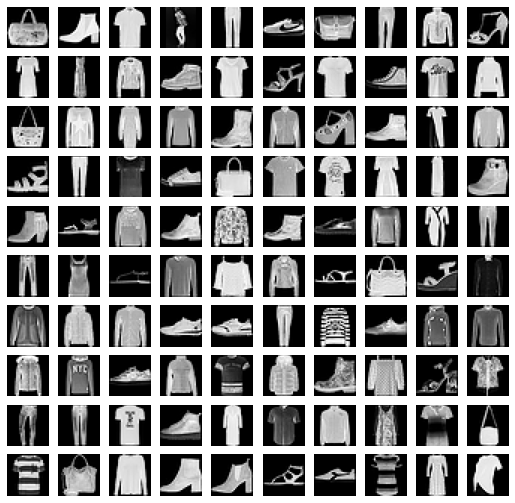

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Lấy 100 phần tử ngẩu nhiên trong 60000
indices = list(np.random.randint(X_train.shape[0], size = 100))

fig = plt.figure(figsize = (9, 9)) # Tạo các khung hiển thị kích thuốc 9x9
columns = 10
rows = 10
for i in range (1,columns*rows + 1 ):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i) # Thêm từng cái ảnh vào fig
    plt.axis('off')
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

### Với bài toán có thêm 10000 tập validate từ tập train (60000)
- Tức là 50000 train
- 10000 test
- 10000 validate

In [5]:
m_train = 50000
m_test = 10000
m_validate = 10000
# Tạo list 10000 số từ 50000 -> 59999
mask = list(range(m_train, m_train + m_validate))
X_val = X_train[mask]
Y_val = Y_train[mask]

# Tập train từ 0->49999
mask = list(range(0,m_train))
X_train = X_train[mask]
Y_train = Y_train[mask]
# Reshape data sang dạng hàng (x,1)
print(X_train.shape)
X_train = X_train.reshape(m_train, -1)
X_val = X_val.reshape(m_validate,-1)
X_test = X_test.reshape(m_test,-1)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", Y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", Y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", Y_test.shape)


(50000, 784)
X_train shape:  (50000, 784)
y_train shape:  (50000,)
X_val shape:  (10000, 784)
y_val shape:  (10000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)


## 3. Dữ liệu dạng rời rạc

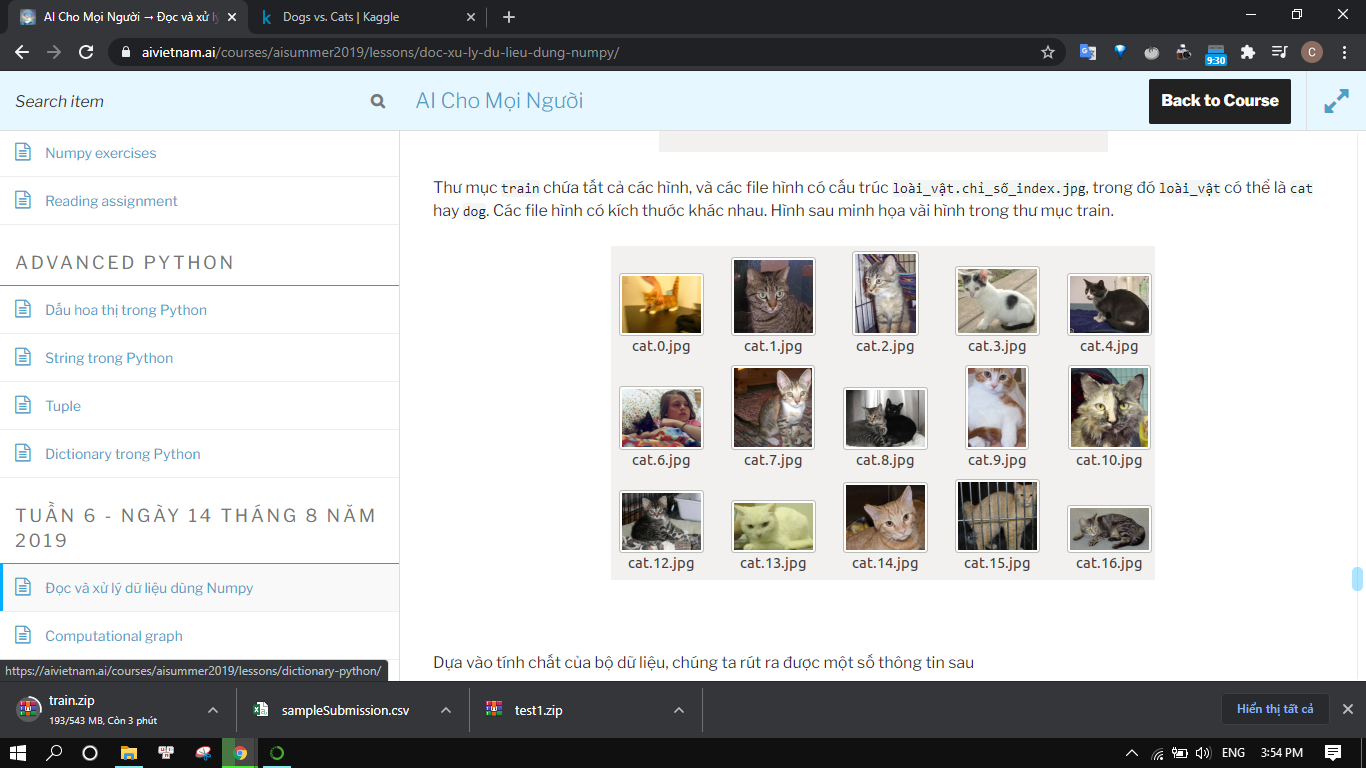

- Label lấy được từ tên của file đó
- Các ảnh có kích thước khác nhau cần đưa về cùng kích thước
- Đưa dữa liệu về dạng binary để thuận tiện cho việc sử dụng nhiều lần

In [9]:
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from PIL import Image

Train = 